In [2]:
import pandas as pd
import matplotlib.pyplot as plt
file_path = 'Dataset .csv'
df = pd.read_csv(file_path)
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


TASK 1: Restaurant Ratings

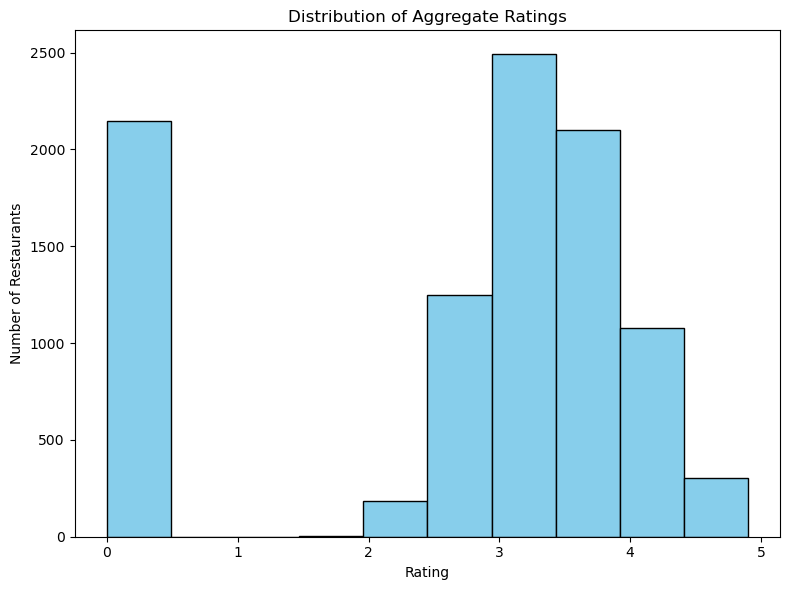

Most Common Rating Range: 3-4
Average Number of Votes Received by Restaurants: 156.91


In [5]:
# Analyze the distribution of aggregate ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Number of Restaurants')
plt.title('Distribution of Aggregate Ratings')
plt.tight_layout()
plt.show()

# Determine the most common rating range
rating_range_counts = pd.cut(df['Aggregate rating'], bins=[0, 2, 3, 4, 5], labels=['0-2', '2-3', '3-4', '4-5']).value_counts()
most_common_rating_range = rating_range_counts.idxmax()

# Calculate the average number of votes received by restaurants
average_votes = df['Votes'].mean()

# Display the results
print(f"Most Common Rating Range: {most_common_rating_range}")
print(f"Average Number of Votes Received by Restaurants: {average_votes:.2f}")

TASK 2: Cuisine Combination

In [7]:
# Identify the most common combinations of cuisines
# If cuisines are stored as a comma-separated string, split and count combinations
df['Cuisine List'] = df['Cuisines'].apply(lambda x: tuple(sorted(x.split(','))) if pd.notnull(x) else ())
cuisine_combinations = df['Cuisine List'].value_counts().head(10)

# Determine if certain cuisine combinations tend to have higher ratings
average_rating_per_combination = df.groupby('Cuisine List')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

# Display the results
print("Most Common Cuisine Combinations:")
print(cuisine_combinations)

print("\nTop 10 Cuisine Combinations with the Highest Average Ratings:")
print(average_rating_per_combination)

Most Common Cuisine Combinations:
Cuisine List
(North Indian,)                       936
( Chinese, North Indian)              511
(Chinese,)                            354
(Fast Food,)                          354
( Mughlai, North Indian)              334
(Cafe,)                               299
( Chinese,  Mughlai, North Indian)    267
(Bakery,)                             218
( Desserts, Bakery)                   170
(Street Food,)                        149
Name: count, dtype: int64

Top 10 Cuisine Combinations with the Highest Average Ratings:
Cuisine List
(World Cuisine,)                       4.9
( Contemporary, European)              4.9
( Bar Food,  Steak, Burger)            4.9
( Bakery,  Continental, Italian)       4.9
( Burger,  Grill, American)            4.9
( German, European)                    4.9
( Deli, Italian)                       4.9
( BBQ,  Sandwich, American)            4.9
( Asian,  Indian, European)            4.9
( American,  Healthy Food, Mexican)    4.9
N

TASK 3: Geographic Analysis

In [10]:
import folium
from folium.plugins import MarkerCluster

# Drop rows with missing coordinates
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create a base map centered at the mean latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(restaurant_map)

# Plot each restaurant on the map
for idx, row in df.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=row.get('Name', 'Restaurant')).add_to(marker_cluster)

# Display the map
restaurant_map.save('restaurant_map.html')
print("Map saved as 'restaurant_map.html'. You can download and view it locally.")

Map saved as 'restaurant_map.html'. You can download and view it locally.


TASK 4: Restaurant Chains

In [12]:
# Identify potential restaurant chains by finding names with multiple occurrences
chain_counts = df['Restaurant Name'].value_counts()
restaurant_chains = chain_counts[chain_counts > 1]

# Filter dataset to include only restaurant chains
chain_data = df[df['Restaurant Name'].isin(restaurant_chains.index)]

# Analyze average ratings and popularity (e.g., average votes) of each restaurant chain
chain_analysis = chain_data.groupby('Restaurant Name').agg(
    Average_Rating=('Aggregate rating', 'mean'),
    Average_Votes=('Votes', 'mean'),
    Number_of_Locations=('Restaurant Name', 'count')
).sort_values(by='Number_of_Locations', ascending=False)

# Display the analysis
print("Restaurant Chains Analysis:")
print(chain_analysis.head(10))

Restaurant Chains Analysis:
                  Average_Rating  Average_Votes  Number_of_Locations
Restaurant Name                                                     
Cafe Coffee Day         2.419277      29.253012                   83
Domino's Pizza          2.740506      84.088608                   79
Subway                  2.907937      97.206349                   63
Green Chick Chop        2.672549      18.901961                   51
McDonald's              3.339583     110.229167                   48
Keventers               2.870588      37.147059                   34
Pizza Hut               3.320000     165.366667                   30
Giani                   2.689655      29.448276                   29
Baskin Robbins          1.860714      15.285714                   28
Barbeque Nation         4.353846    1082.384615                   26
